In [ ]:
import pandas as pd
import numpy as np
import os
import pickle
import datetime
from datetime import date
from datetime import datetime
from sklearn.model_selection import train_test_split
from itertools import combinations_with_replacement
from itertools import combinations
from itertools import permutations
from itertools import product 
import random
import csv
import matplotlib.mlab as mlab
import scipy.linalg as lng # linear algebra from scipy library
import matplotlib . pyplot as plt # library for plots
import matplotlib.animation as animation # lets animate the plots!
from matplotlib.pyplot import figure
import time

In [ ]:
# setting saving directory
today = date.today()
now = datetime.now()
print (today)
print (now)
dt_string = now.strftime("%d-%m-%Y_%H-%M-%S") #do not put : or similar 
print("date and time =", dt_string)	    
root = "C:/Users/arita/Documents/private/Data Engineering/2semestre/Stochastic_modeling/Project/data/outputs"
#'/content/drive/My Drive/02443-Stochastic Simulation/Project/data_stochastic_modeling'

#saving function
def saveAsCSV(df,name,rootdir = root):
    """
    df = dataframe
    name = name for saving in format: 'thisisthename.csv'
    rootdir = local saving directory, default is root
    """
    dt_string = now.strftime("%d-%m-%Y_%H-%M-%S")
    savepath = rootdir +'/' + dt_string+'_'+ name 
    df.to_csv ( savepath, index = False, header=True)

#loading function
def loadCSV(name,rootdir = root):
    """
    rootdir = local saving directory, default is root
    name = exact name (including datetime and extention .csv)
    """
    loadpath = rootdir +'/'+ name 
    print ("loading: ",loadpath)
    df = pd.read_csv(loadpath)
    return df

2020-06-23
2020-06-23 14:10:52.162982
date and time = 23-06-2020_14-10-52


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
 
!ls "/content/drive/My Drive"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
'02285- AI and Multi Agent Systems'   Documents
'02443-Stochastic Simulation'	     'Documents (old stuff)'
 02582-ComputationalDataAnalysis      Google
'42634- X tech Entrepreneurship'     'Model Outputs'
 Booklet.docx			      Pictures
'Colab Notebooks'		      pictures_presentation
'DeepMinds-v2.zip (Unzipped Files)'   presentazioni
'DeepMinds.zip (Unzipped Files)'      VIT


In [ ]:
folder = "/content/drive/My Drive/02443-Stochastic Simulation/Project/data_stochastic_modeling"

os.chdir(folder)
os.getcwd()
#os.chdir('C:\\Users\\arita\\Documents\\GitHub\\02443-SimSolarEnergy\\code\\tm')

'/content/drive/My Drive/02443-Stochastic Simulation/Project/data_stochastic_modeling'

In [ ]:
os.getcwd()

'/content/drive/My Drive/02443-Stochastic Simulation/Project/data_stochastic_modeling'

# Loading Files

In [ ]:
with open('SimPower_P_t_child_551_People__NumOfDays_365.csv','rb') as f:
    container_PowLists = pickle.load(f)

# Check

# sum

In [ ]:
def SumByTimeStep(container_PowLists,timesteps):
  start_time = time.time()
  Power_all = [[] for i in range(timesteps)]
  for t in range (len(container_PowLists[1])):
    sum_i = 0
    for i in range(len(container_PowLists)):
      sum_i += container_PowLists[i][t]
    Power_all[t]= sum_i

  print("--- %s seconds ---" % (time.time() - start_time))
  return (Power_all)

In [ ]:
#save
Power_all_in_time = SumByTimeStep(container_PowLists,timesteps)
savelabel = 'Power_all_child_551'
with open( savelabel+'.csv','wb') as f:
    pickle.dump(Power_all_in_time, f)

--- 8.955081224441528 seconds ---


([<matplotlib.axis.YTick at 0x7f89c274cba8>,
 <a list of 31 Text major ticklabel objects>)

<Figure size 720x1080 with 0 Axes>

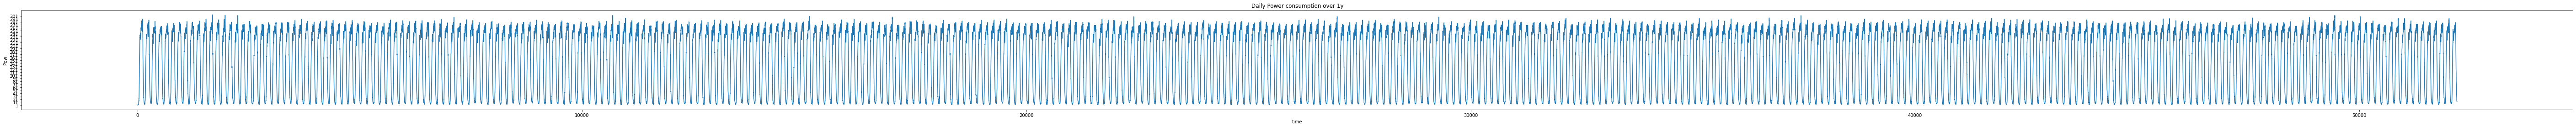

In [ ]:
# 10min  POWER CONSUMPTION PLOT over 1Y
fig = plt.figure(figsize=(10, 15))
plot_lenght = 100
plot_height = 4
if plot_lenght>200:
    plot_lenght= 200
    plot_height = 8
figure(figsize=(plot_lenght,plot_height))
T = np.arange(len(Power_all_in_time))

plt.plot(T, Power_all_in_time)
plt.title('Daily Power consumption over 1y')
plt.xlabel('time')
plt.ylabel('Pow')
plt.yticks(np.arange(min(Power_all_in_time), max(Power_all_in_time), 10))
#plt.grid(axis='Pow')#, linestyle='-')

<Figure size 720x1080 with 0 Axes>

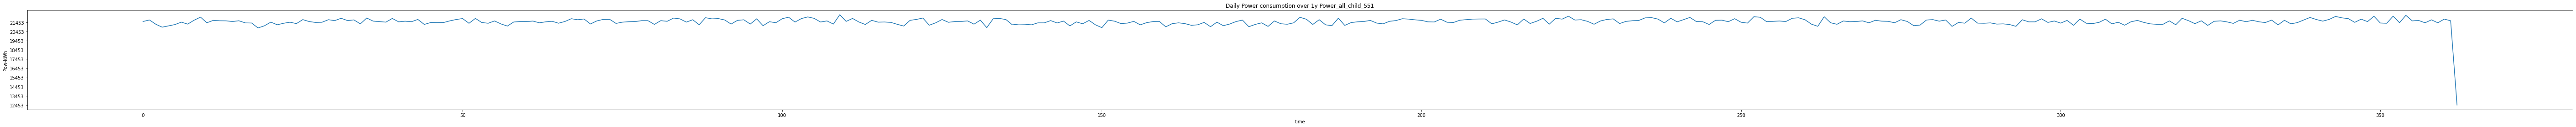

In [ ]:
#get daily average power consumption
i = 0
daily_pow_consumption = []
while i < len(Power_all_in_time):
    daily_pow_consumption.append(round(sum(Power_all_in_time[i:(i+144)]),2))
    i +=144

# DAILY POWER CONSUMPTION PLOT over 1Y
fig = plt.figure(figsize=(10, 15))
plot_lenght = 100
plot_height = 4
if plot_lenght>200:
    plot_lenght= 200
    plot_height = 8
figure(figsize=(plot_lenght,plot_height))
T = np.arange(len(daily_pow_consumption))

title = ('Daily Power consumption over 1y %s'%savelabel)
plt.plot(T, daily_pow_consumption)
plt.title(title)
plt.xlabel('time')
plt.ylabel('Pow-kWh')
plt.yticks(np.arange(min(daily_pow_consumption), max(daily_pow_consumption), 1000))
#plt.grid(axis=daily_pow_consumption)


plt.savefig(title+'.png')

In [ ]:
#os.chdir('C:\\Users\\arita\\Documents\\GitHub\\02443-SimSolarEnergy\\code\\figures\\')
#root = "C:/Users/arita/Documents/private/Data Engineering/2semestre/Stochastic_modeling/Project/plots_images_graphs"
now = datetime.now()
dt_string = now.strftime("%d-%m-%Y_%H-%M-%S")
savelabel = dt_string+title+'_'
plt.savefig(savelabel+'.png')

<Figure size 432x288 with 0 Axes>